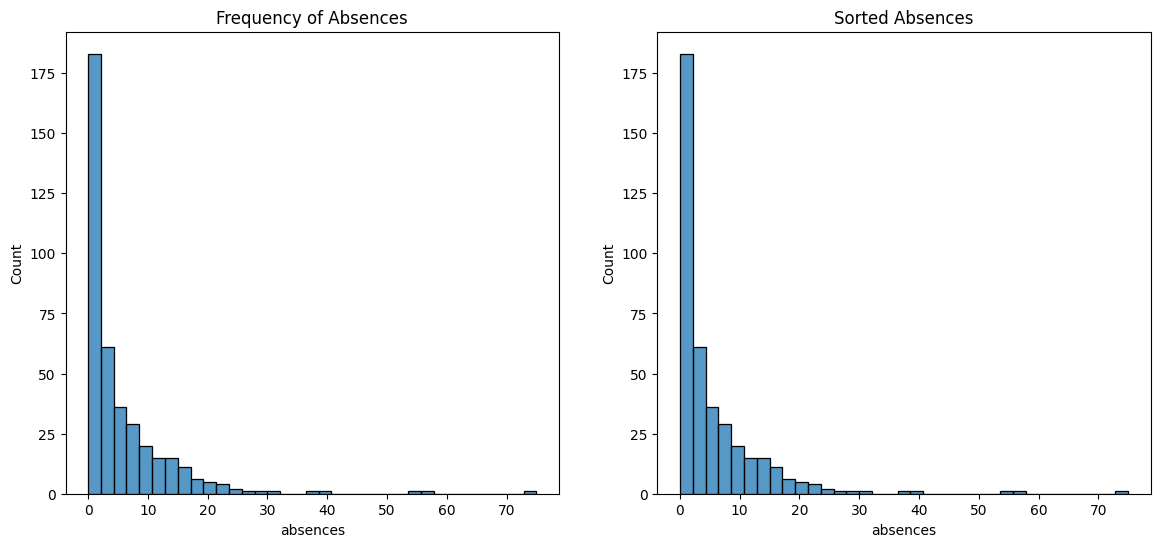

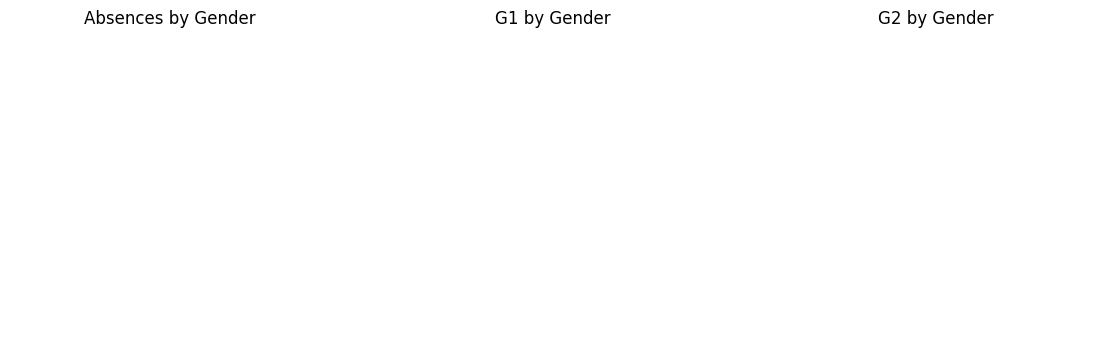

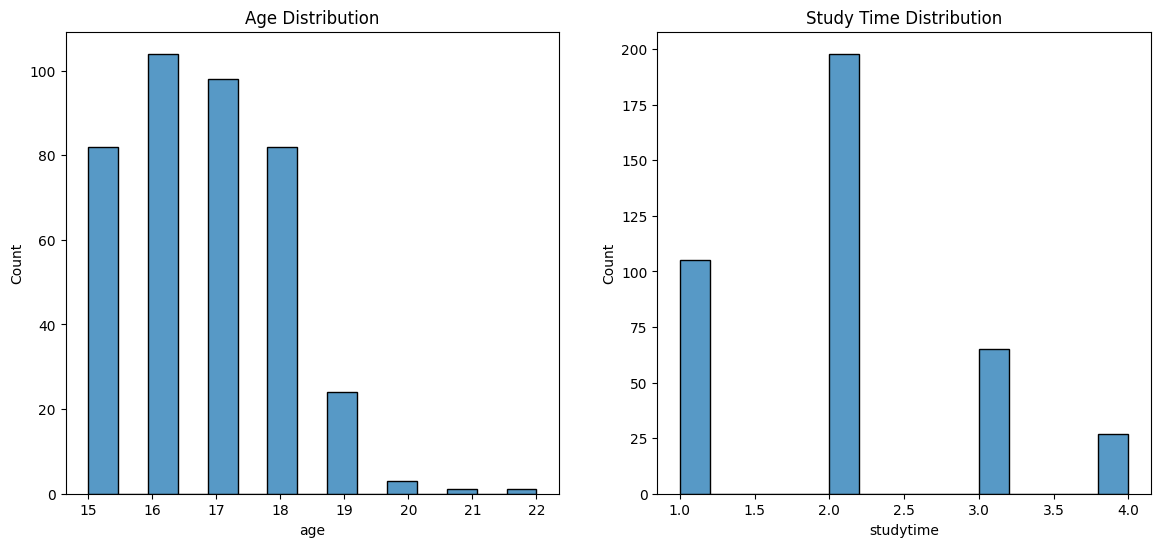

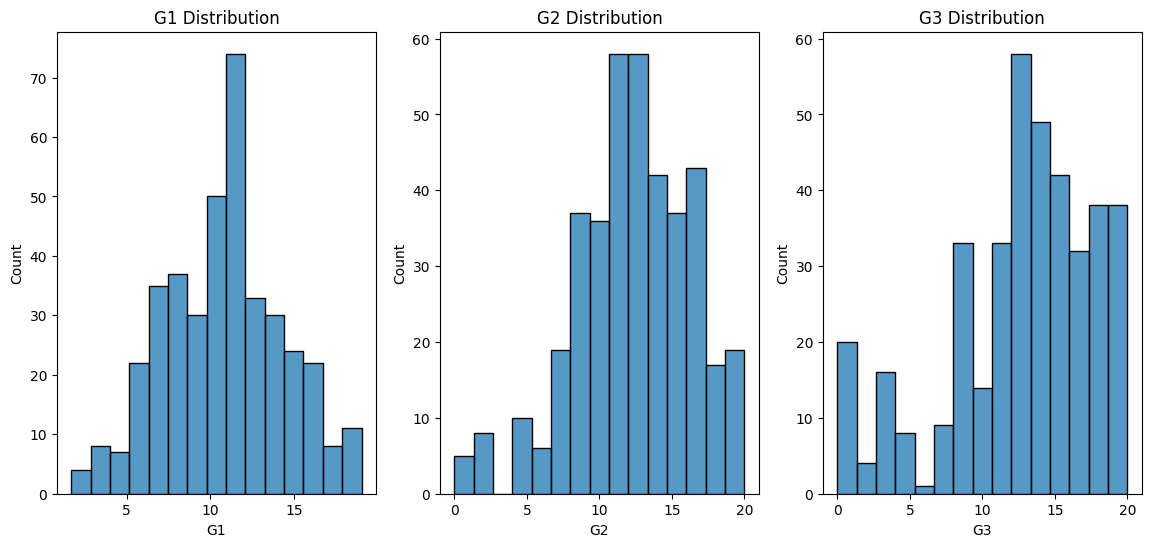

<ipython-input-4-1920b0e7ec85>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['G1'], palette="rainbow")


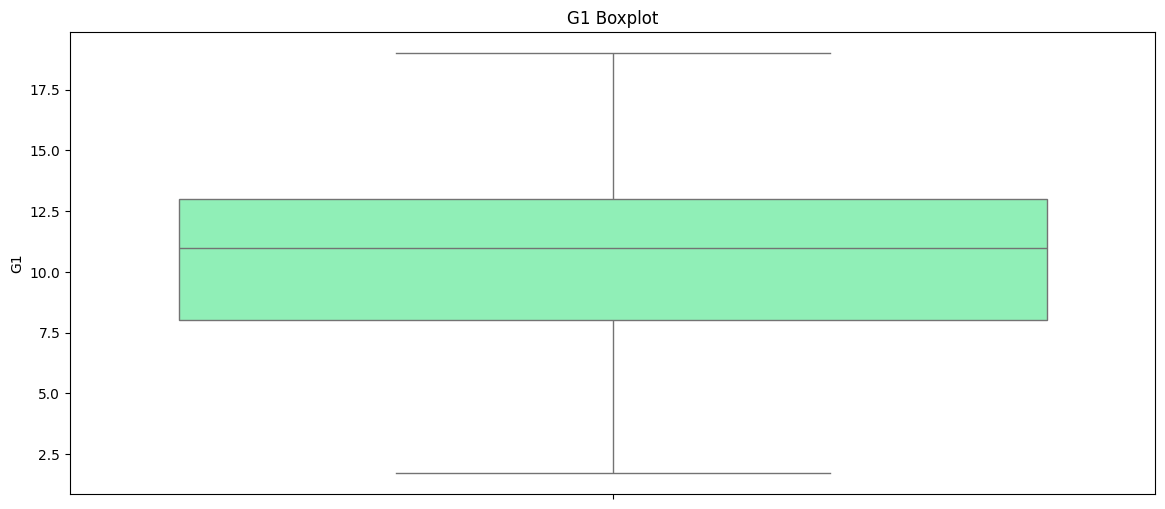

<ipython-input-4-1920b0e7ec85>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['G2'], palette="rainbow")
<ipython-input-4-1920b0e7ec85>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['G2'], palette="rainbow")


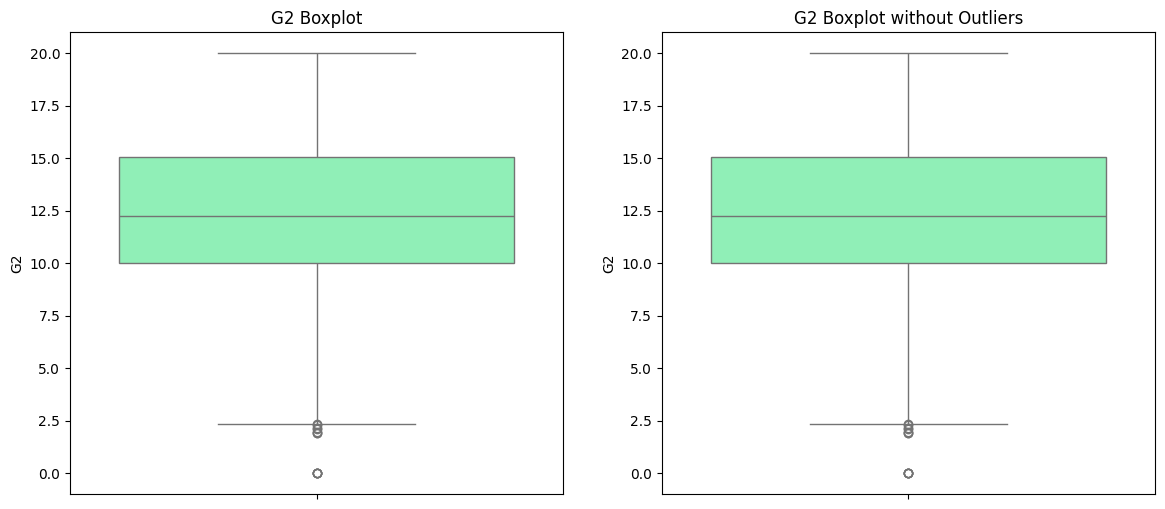

<ipython-input-4-1920b0e7ec85>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['G3'], palette="rainbow")
<ipython-input-4-1920b0e7ec85>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['G3'], palette="rainbow")


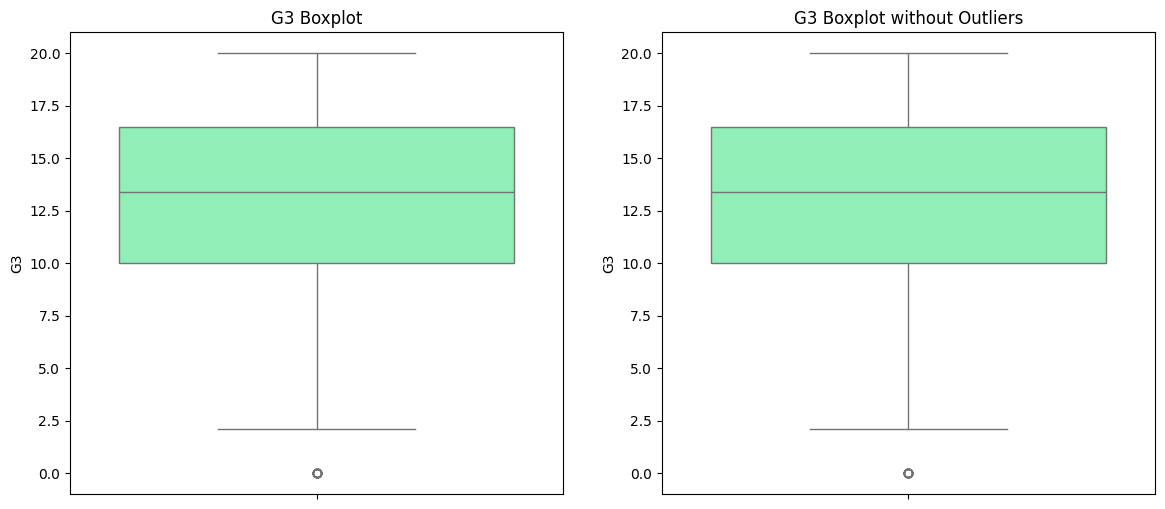

R-squared for G1: 0.8915731753777904
R-squared for G2: 0.9487638289660798
R-squared for G3: 0.9215302979938956


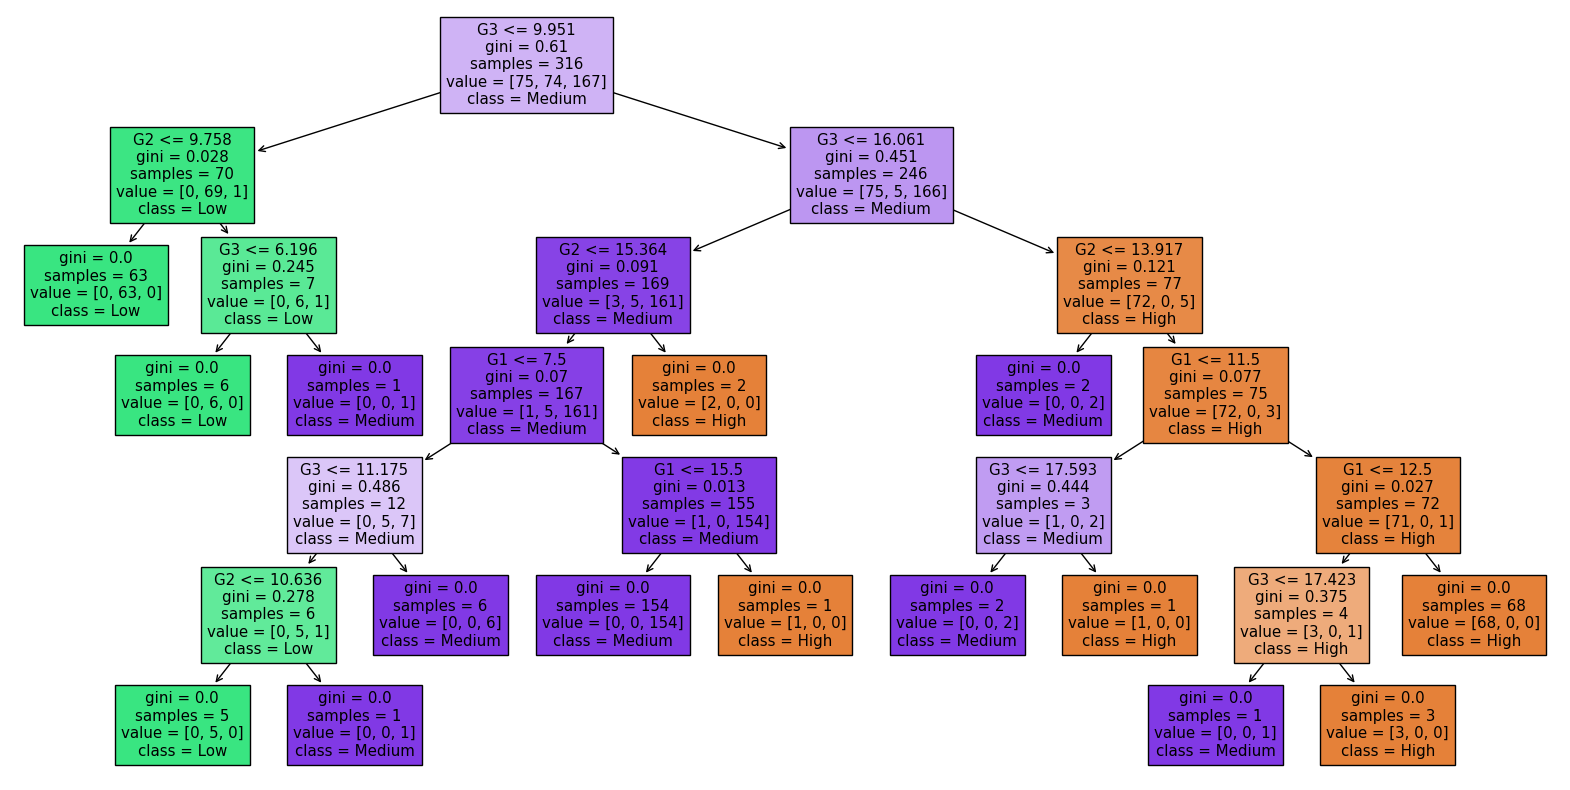

Predicted class: High
Classification accuracy: 0.9746835443037974


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

# Cleansing
df['sex'] = df['sex'].map({'Male': 'M', 'Female': 'F'})

# Fill missing values in 'internet' with mode
df['internet'].fillna(df['internet'].mode()[0], inplace=True)

# Visualization
# 1. Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['absences'], kde=False)
plt.title("Frequency of Absences")

plt.subplot(1, 2, 2)
sns.histplot(df['absences'].sort_values(), kde=False)
plt.title("Sorted Absences")

plt.show()

# Pie chart for absences and gender
plt.figure(figsize=(14, 6))

sex_abs = df.groupby('sex')['absences'].mean()
plt.subplot(1, 3, 1)
plt.pie(sex_abs, labels=[f'{sex} = {round(val/sum(sex_abs)*100, 2)}%' for sex, val in zip(sex_abs.index, sex_abs)], autopct='%1.1f%%')
plt.title("Absences by Gender")

# Pie chart for G1 and gender
g1_by_sex = df.groupby('sex')['G1'].mean()
plt.subplot(1, 3, 2)
plt.pie(g1_by_sex, labels=[f'{sex} = {round(val/sum(g1_by_sex)*100, 2)}%' for sex, val in zip(g1_by_sex.index, g1_by_sex)], autopct='%1.1f%%')
plt.title("G1 by Gender")

# Pie chart for G2 and gender
g2_by_sex = df.groupby('sex')['G2'].mean()
plt.subplot(1, 3, 3)
plt.pie(g2_by_sex, labels=[f'{sex} = {round(val/sum(g2_by_sex)*100, 2)}%' for sex, val in zip(g2_by_sex.index, g2_by_sex)], autopct='%1.1f%%')
plt.title("G2 by Gender")

plt.show()

# 2. Histogram
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=15, kde=False)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['studytime'], bins=15, kde=False)
plt.title("Study Time Distribution")

plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['G1'], bins=15, kde=False)
plt.title("G1 Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df['G2'], bins=15, kde=False)
plt.title("G2 Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df['G3'], bins=15, kde=False)
plt.title("G3 Distribution")

plt.show()

# 3. Box plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 1, 1)
sns.boxplot(y=df['G1'], palette="rainbow")
plt.title("G1 Boxplot")

plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['G2'], palette="rainbow")
plt.title("G2 Boxplot")

# Handling outliers in G2
Q1_G2 = df['G2'].quantile(0.25)
Q3_G2 = df['G2'].quantile(0.75)
IQR_G2 = Q3_G2 - Q1_G2
min_G2 = df['G2'].min()
max_G2 = df['G2'].max()

df['G2'] = np.where(df['G2'] < min_G2, min_G2, df['G2'])
df['G2'] = np.where(df['G2'] > max_G2, max_G2, df['G2'])

plt.subplot(1, 2, 2)
sns.boxplot(y=df['G2'], palette="rainbow")
plt.title("G2 Boxplot without Outliers")

plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['G3'], palette="rainbow")
plt.title("G3 Boxplot")

# Handling outliers in G3
Q1_G3 = df['G3'].quantile(0.25)
Q3_G3 = df['G3'].quantile(0.75)
IQR_G3 = Q3_G3 - Q1_G3
min_G3 = df['G3'].min()
max_G3 = df['G3'].max()

df['G3'] = np.where(df['G3'] < min_G3, min_G3, df['G3'])
df['G3'] = np.where(df['G3'] > max_G3, max_G3, df['G3'])

plt.subplot(1, 2, 2)
sns.boxplot(y=df['G3'], palette="rainbow")
plt.title("G3 Boxplot without Outliers")

plt.show()

# Modeling
# G1
X = df.drop(columns=['G1', 'G2', 'G3'])
y = df['G1']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
pred_1 = model.predict(X_test)
r_squared_G1 = r2_score(y_test, pred_1)

print(f'R-squared for G1: {r_squared_G1}')

# G2
y = df['G2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
pred_2 = model.predict(X_test)
r_squared_G2 = r2_score(y_test, pred_2)

print(f'R-squared for G2: {r_squared_G2}')

# G3
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
pred_3 = model.predict(X_test)
r_squared_G3 = r2_score(y_test, pred_3)

print(f'R-squared for G3: {r_squared_G3}')

# Classification
df['AVG'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# Handling outliers in AVG
Q1_AVG = df['AVG'].quantile(0.25)
Q3_AVG = df['AVG'].quantile(0.75)
IQR_AVG = Q3_AVG - Q1_AVG
min_AVG = df['AVG'].min()
max_AVG = df['AVG'].max()

df['AVG'] = np.where(df['AVG'] < min_AVG, min_AVG, df['AVG'])
df['AVG'] = np.where(df['AVG'] > max_AVG, max_AVG, df['AVG'])

# Build classification levels
df['Levels'] = pd.cut(df['AVG'], bins=[min_AVG, Q1_AVG, Q3_AVG, max_AVG], labels=['Low', 'Medium', 'High'], include_lowest=True)

# Decision Tree
X = df[['G1', 'G2', 'G3']]
y = df['Levels']

# Encode Levels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=['G1', 'G2', 'G3'], class_names=le.classes_, filled=True)
plt.show()

# Test prediction
new_data = pd.DataFrame({'G1': [1], 'G2': [22], 'G3': [20]})
pred = clf.predict(new_data)
print(f'Predicted class: {le.inverse_transform(pred)[0]}')

# Classification accuracy
y_pred = clf.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Classification accuracy: {accuracy}')
